# Esercitazione 3
Nell'esercitazione 3 si richiede l'implementazione, attraverso metodi Monte Carlo, dell'algoritmo del moto browniano geometrico (GBM). L'algoritmo è utilizzato per la predizione del prezzo degli asset europei secondo la teoria Black-Scholes.

Per poter avere un confronto con una predizione teorica, ho recuperato il codice per il calcolo della soluzione analitica delle equazioni di Black-Scholes per _call_ e _put_, che contiene anche i parametri di $S_0$, $K$, $T$, $r$ e $\sigma$ utilizzati nelle equazioni.

In [4]:
import scipy
from scipy.special import erf
import numpy as np
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P


if __name__ == "__main__":
    call_an, put_an = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call_an)
    print("put: ", put_an)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


### Stima diretta

Nel calcolo diretto ho stimato il valore del prezzo $S(T)$ per $T=1$: per $S(T)>K$, ho assegnato a _call_ il valore $\exp(-rT)|S(T)-K|$ e di 0 a _put_, e il viceversa per $S(T)<K$. Ho ripetuto la stima $M=10^6$ volte, e ne ho estratto media e incertezza sulla media attraverso il metodo della media a blocchi.

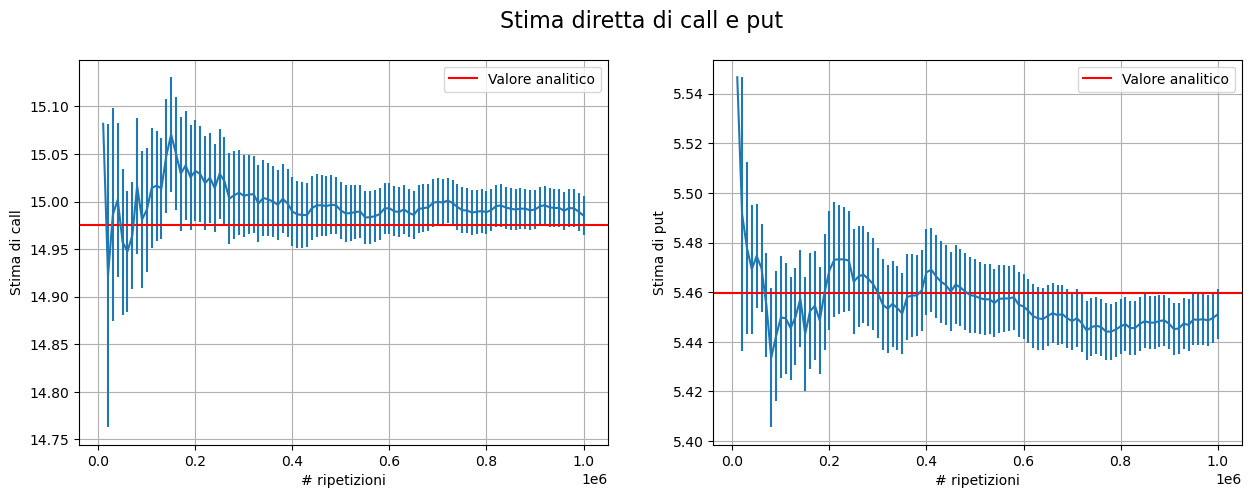

In [10]:
import matplotlib.pyplot as plt

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle("Stima diretta di call e put", size=16)

x, call, error_call = np.loadtxt("3_direct_call.dat", usecols=(0,1,2), delimiter=',', unpack='true')
ax0.errorbar(x,call,yerr=error_call)
ax0.set_xlabel('# ripetizioni')
ax0.set_ylabel('Stima di call')
ax0.grid(True)
ax0.axhline(y=call_an, color='r', linestyle='-', label='Valore analitico')
ax0.legend()

x, put, error_put = np.loadtxt("3_direct_put.dat", usecols=(0,1,2), delimiter=',', unpack='true')
ax1.errorbar(x,put,yerr=error_put)
ax1.set_xlabel('# ripetizioni')
ax1.set_ylabel('Stima di put')
ax1.grid(True)
ax1.axhline(y=put_an, color='r', linestyle='-', label='Valore analitico')
ax1.legend()

plt.show()

Come è possibile vedere dai grafici, entrambe le stime sono entro un $\sigma_{mean}$ dal valore analitico.

### Stima discretizzata
Per la stima discretizzata ho ripetuto la stessa procedura di assegnazione a _call_ e _put_, ma valutando il prezzo $S(T)$ ricorsivamente, dividendo $T$ in $10^2$ intervalli e stimando di volta in volta $S(t_{i+1})$ a partire da $S(t_i)$, fino a $S(t_{100})=S(T)$. Analogamente al caso diretto, ho ripetuto la stima $M=10^6$ volte, e ho calcolato media e incertezza attraverso il metodo della media a blocchi.

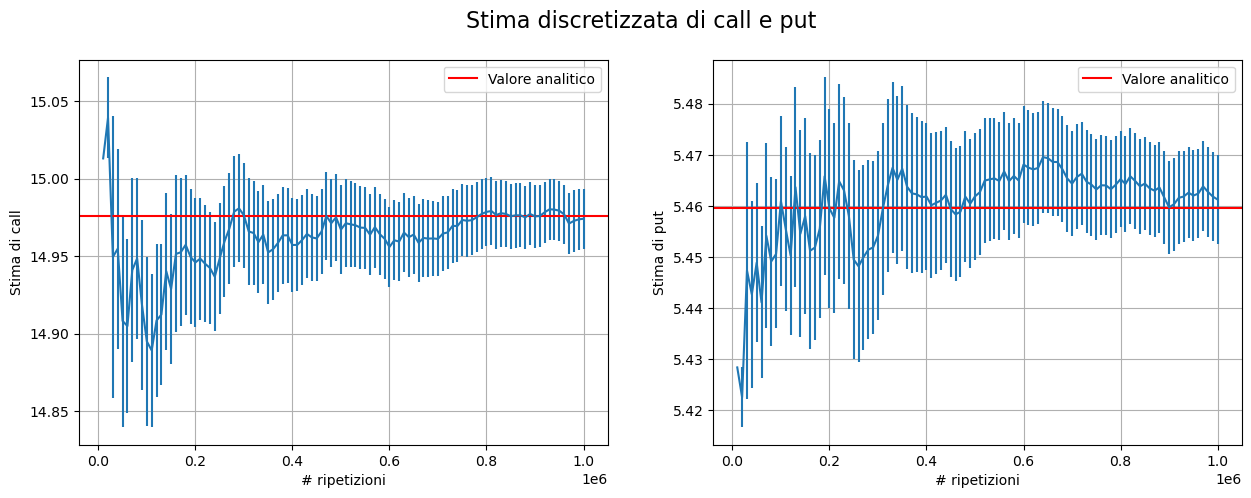

In [12]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle("Stima discretizzata di call e put", size=16)

x, call, error_call = np.loadtxt("3_discret_call.dat", usecols=(0,1,2), delimiter=',', unpack='true')
ax0.errorbar(x,call,yerr=error_call)
ax0.set_xlabel('# ripetizioni')
ax0.set_ylabel('Stima di call')
ax0.grid(True)
ax0.axhline(y=call_an, color='r', linestyle='-', label='Valore analitico')
ax0.legend()

x, put, error_put = np.loadtxt("3_discret_put.dat", usecols=(0,1,2), delimiter=',', unpack='true')
ax1.errorbar(x,put,yerr=error_put)
ax1.set_xlabel('# ripetizioni')
ax1.set_ylabel('Stima di put')
ax1.grid(True)
ax1.axhline(y=put_an, color='r', linestyle='-', label='Valore analitico')
ax1.legend()

plt.show()


Come è possibile vedere dai grafici, anche qui l'accorso tra metodo computazionale e analitico è molto buono.